<a href="https://colab.research.google.com/github/s1230038/autoencoder/blob/master/autoencoder_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# https://elix-tech.github.io/ja/2016/07/17/autoencoder.html
# adding https://gertjanvandenburg.com/blog/autoencoder/
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from keras.datasets import mnist
from keras import backend as K

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='relu')(encoded) 
autoencoder = Model(inputs=input_img, outputs=decoded) # https://medium.com/@zhuixiyou/userwarning-update-your-model-call-to-the-keras-2-api-8a6a5955daac
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255. # 画像データは0から1の値を取るように規格化
x_test = x_test.astype('float32') / 255.
# x_trainは (60000, 28, 28) という形をしていますが、784次元の入力になるように (60000, 784) に変形
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0394 - acc: 0.0105 - val_loss: 0.0213 - val_acc: 0.0128
Epoch 2/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.0187 - acc: 0.0121 - val_loss: 0.0164 - val_acc: 0.0118
Epoch 3/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.0159 - acc: 0.0117 - val_loss: 0.0150 - val_acc: 0.0116
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.0149 - acc: 0.0113 - val_loss: 0.0143 - val_acc: 0.0116
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.0145 - acc: 0.0120 - val_loss: 0.0141 - val_acc: 0.0110
Epoch 6/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.0143 - acc: 0.0117 - val_loss: 0.0139 - val_acc: 0.0122
Epoch 7/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.0142 - acc: 0.0118 - val_loss: 0.0138 - val_acc

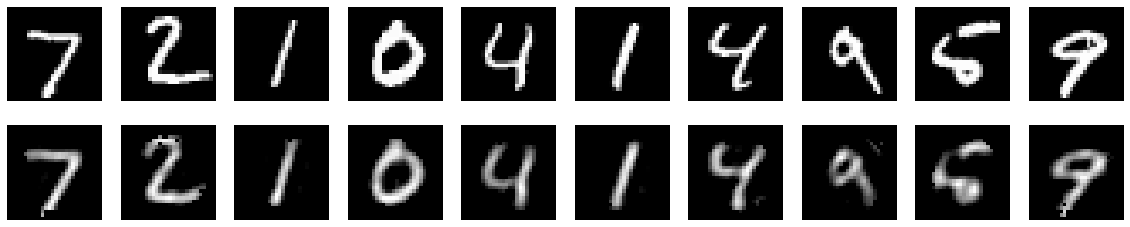

In [7]:
import matplotlib.pyplot as plt

# 学習した重みを保存したり、読み込みたい場合
autoencoder.save_weights('autoencoder.h5')
autoencoder.load_weights('autoencoder.h5')

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

# 何個表示するか
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from google.colab import files
# files.download('autoencoder.h5')